## JWST F1130W Carine ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 25 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1130W"
fwhm = 3.3
basename = "jw0273100200"

crval = [159.21261854583094, -58.620018010874205]
# rotation = 103.
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.18453314576264052, -0.032365850976261525]
tile2_shifts = [0.18538584899573868, -0.03966800205771968]
tile3_shifts = [1.7505750809691034, -1.826683328950826]
tile4_shifts = [0.1874700534625803, -0.03952807029062376]
tile5_shifts = [0.18938011964430956, -0.037490623824123034]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [50., 2000.]
# display range for calibrated images
drange_cal = [30., 2000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1130W/stage0/jw02731002005_02103_00001_mirimage_uncal.fits', './F1130W/stage0/jw02731002003_02103_00008_mirimage_uncal.fits', './F1130W/stage0/jw02731002002_02103_00003_mirimage_uncal.fits', './F1130W/stage0/jw02731002005_02103_00004_mirimage_uncal.fits', './F1130W/stage0/jw02731002005_02103_00003_mirimage_uncal.fits', './F1130W/stage0/jw02731002004_02103_00003_mirimage_uncal.fits', './F1130W/stage0/jw02731002004_02103_00005_mirimage_uncal.fits', './F1130W/stage0/jw02731002002_02103_00001_mirimage_uncal.fits', './F1130W/stage0/jw02731002003_02103_00001_mirimage_uncal.fits', './F1130W/stage0/jw02731002004_02103_00001_mirimage_uncal.fits', './F1130W/stage0/jw02731002003_02103_00005_mirimage_uncal.fits', './F1130W/stage0/jw02731002001_02103_00008_mirimage_uncal.fits', './F1130W/stage0/jw02731002005_02103_00006_mirimage_uncal.fits', './F1130W/stage0/jw02731002002_02103_00007_mirimage_uncal.fits', './F1130W/stage0/jw02731002004_02103_00008_mirimage_uncal.fits', './F1130W/stage0/jw02731

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-25 12:42:22,325 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:42:22,326 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:42:22,327 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:42:22,327 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:42:22,328 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:42:22,328 - stpipe 

./F1130W/stage0/jw02731002005_02103_00001_mirimage_uncal.fits


2022-07-25 12:42:22,431 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-25 12:42:28,095 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-25 12:42:28,096 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-25 12:42:28,098 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-25 12:42:28,195 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00001_mirimage_uncal.fits>,).
2022-07-25 12:42:28,196 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:42:28,215 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-25 12:42:39,267 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-25 12:42:39,268 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-25 12:42:39,268 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-25 12:42:39,268 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-25 12:42:39,268 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-25 12:42:39,269 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-25 12:42:39,269 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-25 12:42:39,269 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-25 12:42:39,270 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-25 12:42:39,891 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-25 12:42:41,722 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:42:41,728 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:42:41,829 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:42:41,835 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6097 pixels with at least one CR from five groups.
2022-07-25 12:42:41,836 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:42:41,837 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:42:41,936 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:42:46,527 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2022-07-25 12:42:46,683 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2022-07-25 12:42:46,684 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2022-07-25 12:42:46,684 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of processors used for multiprocessing: 10
2022-07-25 12:42:53,761 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-07-25 12:42:53,764 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-07-25 12:42:54,322 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-07-25 12:42:54,325 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2022-07-25 12:42:54,377 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 28
2022-07-25 

2022-07-25 12:42:58,283 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:42:58,284 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-07-25 12:42:58,285 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:42:58,285 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-07-25 12:42:58,286 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.f

./F1130W/stage0/jw02731002003_02103_00008_mirimage_uncal.fits


2022-07-25 12:43:00,163 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:43:00,166 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:43:00,167 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:43:00,168 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:43:00,169 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:43:05,663 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:43:05,682 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:43:06,430 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:43:06,533 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00008_mirimage_uncal.fits>,).
2022-07-25 12:43:06,534 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:43:12,092 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:43:12,094 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:43:12,095 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:43:12,155 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:43:12,160 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3213 pixels with at least one CR from five groups.
2022-07-25 12:43:12,161 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 32 pixels with at least one CR from four groups.
2022-07-25 12:43:12,162 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:43:13,416 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3053 pixels with at least one CR from five groups.
2022-07-25 12:43:13,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:43:13,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:43:13,458 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:43:13,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2662 pixels with at least one CR from five groups.
2022-07-25 12:43:13,579 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:43:13,579 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:43:26,777 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:43:26,778 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:43:26,779 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:43:26,779 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:43:26,780 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:43:26,781 - stpipe 

./F1130W/stage0/jw02731002002_02103_00003_mirimage_uncal.fits


2022-07-25 12:43:29,306 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:43:29,314 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:43:29,315 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:43:29,317 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:43:29,318 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:43:34,651 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:43:34,670 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:43:35,367 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:43:35,466 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00003_mirimage_uncal.fits>,).
2022-07-25 12:43:35,467 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:43:40,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:43:40,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:43:40,982 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:43:41,041 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:43:41,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6913 pixels with at least one CR from five groups.
2022-07-25 12:43:41,048 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 12:43:41,048 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 12:43:42,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2455 pixels with at least one CR from five groups.
2022-07-25 12:43:42,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:43:42,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:43:42,443 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3857 pixels with at least one CR from five groups.
2022-07-25 12:43:42,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:43:42,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:43:42,789 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:43:55,659 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:43:55,660 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:43:55,661 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:43:55,662 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:43:55,662 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:43:55,663 - stpipe 

./F1130W/stage0/jw02731002005_02103_00004_mirimage_uncal.fits


2022-07-25 12:43:57,639 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:43:57,642 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:43:57,643 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:43:57,644 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:43:57,645 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:44:02,797 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:44:02,815 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:44:03,521 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:44:03,620 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00004_mirimage_uncal.fits>,).
2022-07-25 12:44:03,621 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:44:09,172 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 12:44:09,171 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:44:09,172 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 12:44:09,280 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:44:09,286 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:44:09,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2055 pixels with at least one CR from five groups.
2022-07-25 12:44:09,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from fou

2022-07-25 12:44:10,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2339 pixels with at least one CR from five groups.
2022-07-25 12:44:10,441 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:44:10,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:44:10,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3848 pixels with at least one CR from five groups.
2022-07-25 12:44:10,624 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:44:10,625 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:44:10,988 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:44:26,384 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:44:26,386 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:44:26,386 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:44:26,387 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:44:26,388 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:44:26,389 - stpipe 

./F1130W/stage0/jw02731002005_02103_00003_mirimage_uncal.fits


2022-07-25 12:44:28,824 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:44:28,827 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:44:28,828 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:44:28,829 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:44:28,830 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:44:34,040 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:44:34,061 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:44:34,767 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:44:34,873 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00003_mirimage_uncal.fits>,).
2022-07-25 12:44:34,874 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:44:40,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:44:40,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 12:44:40,514 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:44:40,519 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2293 pixels with at least one CR from five groups.
2022-07-25 12:44:40,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:44:40,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 12:44:40,

2022-07-25 12:44:41,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2254 pixels with at least one CR from five groups.
2022-07-25 12:44:41,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:44:41,902 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:44:42,027 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4131 pixels with at least one CR from five groups.
2022-07-25 12:44:42,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:44:42,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:44:42,082 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:44:57,507 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:44:57,508 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:44:57,509 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:44:57,509 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:44:57,510 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:44:57,511 - stpipe 

./F1130W/stage0/jw02731002004_02103_00003_mirimage_uncal.fits


2022-07-25 12:44:59,478 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:44:59,481 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:44:59,482 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:44:59,483 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:44:59,484 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:45:04,612 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:45:04,631 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:45:05,317 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:45:05,421 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00003_mirimage_uncal.fits>,).
2022-07-25 12:45:05,422 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:45:10,878 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:45:10,883 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2539 pixels with at least one CR from five groups.
2022-07-25 12:45:10,884 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:45:10,933 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:45:10,966 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 12:45:10,959 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 1

2022-07-25 12:45:12,121 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:45:12,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2786 pixels with at least one CR from five groups.
2022-07-25 12:45:12,305 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:45:12,306 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:45:12,318 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:45:12,497 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3513 pixels with at least one CR from five groups.
2022-07-25 12:45:12,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:45:12,498 - stpipe.Detector1Pipeline.jump 

2022-07-25 12:45:26,000 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1130W/stage1/jw02731002004_02103_00003_mirimage_rate.fits
2022-07-25 12:45:26,001 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:45:26,007 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:45:26,008 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:45:26,009 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:45:26,009 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix

2022-07-25 12:45:26,142 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

./F1130W/stage0/jw02731002004_02103_00005_mirimage_uncal.fits


2022-07-25 12:45:28,161 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:45:28,164 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:45:28,165 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:45:28,166 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:45:28,167 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:45:33,412 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:45:33,431 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:45:34,129 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:45:34,235 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00005_mirimage_uncal.fits>,).
2022-07-25 12:45:34,236 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:45:39,717 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 12:45:39,718 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 12:45:39,785 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:45:39,808 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:45:39,813 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2668 pixels with at least one CR from five groups.
2022-07-25 12:45:39,814 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 12:45:39,815 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:45:41,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:45:41,205 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3806 pixels with at least one CR from five groups.
2022-07-25 12:45:41,206 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 12:45:41,207 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from three groups.
2022-07-25 12:45:41,234 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:45:41,430 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2252 pixels with at least one CR from five groups.
2022-07-25 12:45:41,431 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four g

2022-07-25 12:45:55,126 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:45:55,127 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:45:55,127 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:45:55,128 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:45:55,129 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002002_02103_00001_mirimage_uncal.fits


2022-07-25 12:45:57,254 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:45:57,257 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:45:57,259 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:45:57,260 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:45:57,261 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:46:02,527 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:46:02,546 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:46:03,263 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:46:03,371 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00001_mirimage_uncal.fits>,).
2022-07-25 12:46:03,372 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:46:09,044 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7602 pixels with at least one CR from five groups.
2022-07-25 12:46:09,045 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 12:46:09,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from three groups.
2022-07-25 12:46:09,069 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:46:09,121 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 12:46:09,114 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:46:09,119 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 12:46:10,510 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:46:10,590 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2654 pixels with at least one CR from five groups.
2022-07-25 12:46:10,591 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:46:10,591 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:46:10,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3830 pixels with at least one CR from five groups.
2022-07-25 12:46:10,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:46:10,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 12:46:24,501 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:46:24,512 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:46:24,513 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:46:24,513 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:46:24,514 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:46:24,515 - stpipe.Detector1

./F1130W/stage0/jw02731002003_02103_00001_mirimage_uncal.fits


2022-07-25 12:46:27,126 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:46:27,129 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:46:27,130 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:46:27,131 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:46:27,132 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:46:32,364 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:46:32,383 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:46:33,085 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:46:33,193 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00001_mirimage_uncal.fits>,).
2022-07-25 12:46:33,194 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:46:38,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3028 pixels with at least one CR from five groups.
2022-07-25 12:46:38,573 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:46:38,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 32 pixels with at least one CR from four groups.
2022-07-25 12:46:38,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from three groups.
2022-07-25 12:46:38,639 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:46:38,645 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3265 pixels with at least one CR from five groups.
2022-07-25 12:46:38,646 - stpipe.Detector1Pipeline.jump - INFO - From highes

2022-07-25 12:46:39,718 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:46:39,829 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2552 pixels with at least one CR from five groups.
2022-07-25 12:46:39,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:46:39,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:46:39,855 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2556 pixels with at least one CR from five groups.
2022-07-25 12:46:39,856 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:46:39,858 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 12:46:54,074 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:46:54,081 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:46:54,082 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:46:54,083 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:46:54,083 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:46:54,084 - stpipe.Detector1

./F1130W/stage0/jw02731002004_02103_00001_mirimage_uncal.fits


2022-07-25 12:46:57,173 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:46:57,176 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:46:57,178 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:46:57,178 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:46:57,179 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:47:02,534 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:47:02,555 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:47:03,274 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:47:03,387 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00001_mirimage_uncal.fits>,).
2022-07-25 12:47:03,388 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:47:08,991 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2283 pixels with at least one CR from five groups.
2022-07-25 12:47:08,992 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:47:08,993 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 12:47:09,002 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:47:09,037 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:47:09,042 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2145 pixels with at least one CR from five groups.
2022-07-25 12:47:09,043 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 12:47:10,224 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:47:10,284 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2978 pixels with at least one CR from five groups.
2022-07-25 12:47:10,285 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:47:10,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:47:10,318 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:47:10,334 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3751 pixels with at least one CR from five groups.
2022-07-25 12:47:10,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four gr

2022-07-25 12:47:23,909 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:47:23,915 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:47:23,916 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:47:23,917 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:47:23,918 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:47:23,918 - stpipe.Detector1

./F1130W/stage0/jw02731002003_02103_00005_mirimage_uncal.fits


2022-07-25 12:47:26,317 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:47:26,320 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:47:26,321 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:47:26,322 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:47:26,323 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:47:31,801 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:47:31,820 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:47:32,523 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:47:32,633 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00005_mirimage_uncal.fits>,).
2022-07-25 12:47:32,634 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:47:38,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3221 pixels with at least one CR from five groups.
2022-07-25 12:47:38,143 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35 pixels with at least one CR from four groups.
2022-07-25 12:47:38,227 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:47:38,228 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:47:38,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2724 pixels with at least one CR from five groups.
2022-07-25 12:47:38,233 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:47:38,233 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 12:47:39,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3097 pixels with at least one CR from five groups.
2022-07-25 12:47:39,672 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:47:39,673 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:47:39,696 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:47:39,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2453 pixels with at least one CR from five groups.
2022-07-25 12:47:39,750 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:47:39,751 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:47:53,859 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:47:53,860 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:47:53,861 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:47:53,862 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:47:53,862 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:47:53,863 - stpipe 

./F1130W/stage0/jw02731002001_02103_00008_mirimage_uncal.fits


2022-07-25 12:47:57,508 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:47:57,511 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:47:57,512 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:47:57,513 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:47:57,514 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:48:02,902 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:48:02,922 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:48:03,628 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:48:03,738 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00008_mirimage_uncal.fits>,).
2022-07-25 12:48:03,739 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:48:09,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10501 pixels with at least one CR from five groups.
2022-07-25 12:48:09,331 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:48:09,395 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:48:09,395 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:48:09,400 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6797 pixels with at least one CR from five groups.
2022-07-25 12:48:09,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 12:48:09,402 - stpipe.Detector1Pipeline.jump - INFO - From highest

2022-07-25 12:48:11,227 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 12:48:11,228 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 12:48:11,637 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:48:11,690 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:48:11,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3860 pixels with at least one CR from five groups.
2022-07-25 12:48:11,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 12:48:11,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 12:48:11,877 - stpipe.Detector1Pipeline.jump -

2022-07-25 12:48:26,297 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:48:26,298 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:48:26,299 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:48:26,300 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:48:26,300 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:48:26,301 - stpipe 

./F1130W/stage0/jw02731002005_02103_00006_mirimage_uncal.fits


2022-07-25 12:48:28,745 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:48:28,748 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:48:28,749 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:48:28,750 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:48:28,751 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:48:34,092 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:48:34,111 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:48:34,813 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:48:34,925 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00006_mirimage_uncal.fits>,).
2022-07-25 12:48:34,926 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:48:40,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:48:40,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 12:48:40,535 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:48:40,564 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:48:40,570 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2137 pixels with at least one CR from five groups.
2022-07-25 12:48:40,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 12:48:40,571 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:48:41,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:48:41,762 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3772 pixels with at least one CR from five groups.
2022-07-25 12:48:41,763 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:48:41,764 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:48:42,354 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:48:42,536 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4448 pixels with at least one CR from five groups.
2022-07-25 12:48:42,537 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gro

2022-07-25 12:48:55,448 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:48:55,449 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:48:55,449 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:48:55,450 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:48:55,450 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002002_02103_00007_mirimage_uncal.fits


2022-07-25 12:48:57,448 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:48:57,452 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:48:57,453 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:48:57,454 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:48:57,455 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:49:02,907 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:49:02,926 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:49:03,633 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:49:03,747 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00007_mirimage_uncal.fits>,).
2022-07-25 12:49:03,748 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:49:09,489 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 12:49:09,490 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 12:49:09,558 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:49:09,588 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-25 12:49:09,581 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:49:09,586 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3671 pixels with at least one CR from five groups.
2022-07-25 12:49:09,587 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 12:49:10,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3303 pixels with at least one CR from five groups.
2022-07-25 12:49:10,981 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:49:10,982 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:49:11,208 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2648 pixels with at least one CR from five groups.
2022-07-25 12:49:11,209 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:49:11,210 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:49:11,494 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:49:24,857 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:49:24,858 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:49:24,858 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:49:24,859 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:49:24,859 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:49:24,860 - stpipe 

./F1130W/stage0/jw02731002004_02103_00008_mirimage_uncal.fits


2022-07-25 12:49:27,270 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:49:27,273 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:49:27,274 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:49:27,275 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:49:27,276 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:49:32,580 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:49:32,602 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:49:33,339 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:49:33,454 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00008_mirimage_uncal.fits>,).
2022-07-25 12:49:33,455 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:49:39,230 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2220 pixels with at least one CR from five groups.
2022-07-25 12:49:39,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:49:39,304 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:49:39,309 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2272 pixels with at least one CR from five groups.
2022-07-25 12:49:39,310 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 12:49:39,310 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 12:49:3

2022-07-25 12:49:40,492 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:49:40,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:49:40,510 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:49:40,690 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2509 pixels with at least one CR from five groups.
2022-07-25 12:49:40,691 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:49:40,692 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:49:40,765 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:49:40,944 - stpipe.Detector1Pipeline.jump - 

2022-07-25 12:49:54,305 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:49:54,306 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:49:54,307 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:49:54,307 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:49:54,308 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:49:54,309 - stpipe 

./F1130W/stage0/jw02731002001_02103_00001_mirimage_uncal.fits


2022-07-25 12:49:56,337 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:49:56,341 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:49:56,342 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:49:56,343 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:49:56,344 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:50:01,674 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:50:01,695 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:50:02,396 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:50:02,510 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00001_mirimage_uncal.fits>,).
2022-07-25 12:50:02,512 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:50:08,164 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:50:08,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 12:50:08,225 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:50:08,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9243 pixels with at least one CR from five groups.
2022-07-25 12:50:08,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 12:50:08,278 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 

2022-07-25 12:50:09,936 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:50:10,421 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:50:10,492 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:50:10,607 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9666 pixels with at least one CR from five groups.
2022-07-25 12:50:10,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 24 pixels with at least one CR from four groups.
2022-07-25 12:50:10,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 12:50:10,677 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12853 pixels with at least one CR from five groups.
2022-07-25 12:50:10,678 - stpipe.Detector1Pipeline.ju

2022-07-25 12:50:25,043 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 12:50:25,406 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1130W/stage1/jw02731002001_02103_00001_mirimage_rate.fits
2022-07-25 12:50:25,407 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:50:25,423 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:50:25,424 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:50:25,424 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:50:25,425 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 12:50:25,564 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02731002002_02103_00004_mirimage_uncal.fits',).
2022-07-25 12:50:25,573 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

./F1130W/stage0/jw02731002002_02103_00004_mirimage_uncal.fits


2022-07-25 12:50:27,391 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:50:27,395 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:50:27,396 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:50:27,397 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:50:27,398 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:50:32,771 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:50:32,790 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:50:33,479 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:50:33,596 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00004_mirimage_uncal.fits>,).
2022-07-25 12:50:33,597 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:50:39,384 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:50:39,384 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:50:39,444 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:50:39,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:50:39,485 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:50:39,491 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6493 pixels with at least one CR from five groups.
2022-07-25 12:50:39,492 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:50:40,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3707 pixels with at least one CR from five groups.
2022-07-25 12:50:40,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:50:40,966 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:50:40,983 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:50:41,064 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2511 pixels with at least one CR from five groups.
2022-07-25 12:50:41,065 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 12:50:41,066 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:50:54,063 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:50:54,064 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:50:54,065 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:50:54,065 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:50:54,066 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:50:54,067 - stpipe 

./F1130W/stage0/jw02731002001_02103_00002_mirimage_uncal.fits


2022-07-25 12:50:56,026 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:50:56,029 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:50:56,030 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:50:56,031 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:50:56,032 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:51:01,393 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:51:01,412 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:51:02,107 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:51:02,226 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00002_mirimage_uncal.fits>,).
2022-07-25 12:51:02,227 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:51:07,915 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10443 pixels with at least one CR from five groups.
2022-07-25 12:51:07,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:51:07,917 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:51:07,927 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:51:07,995 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:51:08,000 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4710 pixels with at least one CR from five groups.
2022-07-25 12:51:08,001 - stpipe.Detector1Pipeline.jump - INFO - From highest

2022-07-25 12:51:09,996 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:51:10,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8696 pixels with at least one CR from five groups.
2022-07-25 12:51:10,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:51:10,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:51:10,186 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3663 pixels with at least one CR from five groups.
2022-07-25 12:51:10,187 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:51:10,188 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:51:25,173 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:51:25,180 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:51:25,181 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:51:25,181 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:51:25,182 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:51:25,182 - stpipe.Detector1

./F1130W/stage0/jw02731002003_02103_00002_mirimage_uncal.fits


2022-07-25 12:51:28,011 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:51:28,014 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:51:28,015 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:51:28,016 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:51:28,017 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:51:33,420 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:51:33,439 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:51:34,128 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:51:34,244 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00002_mirimage_uncal.fits>,).
2022-07-25 12:51:34,245 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:51:40,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from four groups.
2022-07-25 12:51:40,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from three groups.
2022-07-25 12:51:40,215 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:51:40,220 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:51:40,225 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2664 pixels with at least one CR from five groups.
2022-07-25 12:51:40,225 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:51:40,226 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 12:51:41,393 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2392 pixels with at least one CR from five groups.
2022-07-25 12:51:41,394 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:51:41,395 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 12:51:41,498 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2363 pixels with at least one CR from five groups.
2022-07-25 12:51:41,499 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:51:41,500 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:51:41,660 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:51:56,671 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:51:56,672 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:51:56,673 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:51:56,673 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:51:56,674 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:51:56,675 - stpipe 

./F1130W/stage0/jw02731002001_02103_00004_mirimage_uncal.fits


2022-07-25 12:51:58,645 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:51:58,648 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:51:58,650 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:51:58,650 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:51:58,651 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:52:03,990 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:52:04,010 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:52:04,716 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:52:04,836 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00004_mirimage_uncal.fits>,).
2022-07-25 12:52:04,837 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:52:10,668 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:52:10,669 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 12:52:10,716 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:52:10,755 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:52:10,760 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8476 pixels with at least one CR from five groups.
2022-07-25 12:52:10,761 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 12:52:10,762 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 12:52:12,621 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:52:12,622 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:52:13,388 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:52:13,442 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:52:13,573 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7930 pixels with at least one CR from five groups.
2022-07-25 12:52:13,574 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 12:52:13,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-25 12:52:13,637 - stpipe.Detector1Pipeline.jump -

2022-07-25 12:52:28,341 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:52:28,342 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:52:28,342 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:52:28,343 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:52:28,344 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:52:28,344 - stpipe 

./F1130W/stage0/jw02731002002_02103_00002_mirimage_uncal.fits


2022-07-25 12:52:30,306 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:52:30,309 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:52:30,311 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:52:30,312 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:52:30,313 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:52:35,656 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:52:35,675 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:52:36,371 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:52:36,490 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00002_mirimage_uncal.fits>,).
2022-07-25 12:52:36,491 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:52:42,475 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-25 12:52:42,475 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:52:42,490 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:52:42,571 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:52:42,646 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:52:42,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2821 pixels with at least one CR from five groups.
2022-07-25 12:52:42,652 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:52:42,654 - stpipe.Detector1Pipelin

2022-07-25 12:52:43,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:52:43,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 12:52:43,941 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 12:52:43,947 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:52:44,089 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:52:44,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2208 pixels with at least one CR from five groups.
2022-07-25 12:52:44,233 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:52:44,234 - stpipe.Detector1Pipeline.jump -

2022-07-25 12:52:57,752 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:52:57,760 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:52:57,761 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:52:57,761 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:52:57,762 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:52:57,762 - stpipe.Detector1

./F1130W/stage0/jw02731002003_02103_00007_mirimage_uncal.fits


2022-07-25 12:53:00,553 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:53:00,556 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:53:00,558 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:53:00,559 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:53:00,560 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:53:05,938 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:53:05,958 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:53:06,667 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:53:06,787 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00007_mirimage_uncal.fits>,).
2022-07-25 12:53:06,788 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:53:12,743 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 34 pixels with at least one CR from four groups.
2022-07-25 12:53:12,744 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 25 pixels with at least one CR from three groups.
2022-07-25 12:53:12,777 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:53:12,785 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:53:12,791 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2545 pixels with at least one CR from five groups.
2022-07-25 12:53:12,792 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 12:53:12,792 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 12:53:13,992 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:53:13,993 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:53:14,102 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:53:14,150 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:53:14,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2825 pixels with at least one CR from five groups.
2022-07-25 12:53:14,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:53:14,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:53:14,338 - stpipe.Detector1Pipeline.jump - 

2022-07-25 12:53:27,758 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:53:27,759 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:53:27,759 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:53:27,760 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:53:27,761 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:53:27,762 - stpipe 

./F1130W/stage0/jw02731002005_02103_00007_mirimage_uncal.fits


2022-07-25 12:53:29,742 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:53:29,746 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:53:29,747 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:53:29,748 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:53:29,748 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:53:35,073 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:53:35,092 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:53:35,786 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:53:35,910 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00007_mirimage_uncal.fits>,).
2022-07-25 12:53:35,911 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:53:41,777 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 12:53:41,777 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:53:41,799 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:53:41,853 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:53:41,858 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3300 pixels with at least one CR from five groups.
2022-07-25 12:53:41,859 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:53:41,860 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 12:53:43,086 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3231 pixels with at least one CR from five groups.
2022-07-25 12:53:43,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 12:53:43,089 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 12:53:43,160 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:53:43,238 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4183 pixels with at least one CR from five groups.
2022-07-25 12:53:43,239 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:53:43,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:53:57,113 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:53:57,114 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:53:57,114 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:53:57,115 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:53:57,115 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:53:57,116 - stpipe 

./F1130W/stage0/jw02731002004_02103_00004_mirimage_uncal.fits


2022-07-25 12:53:59,159 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:53:59,162 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:53:59,163 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:53:59,164 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:53:59,165 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:54:04,450 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:54:04,470 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:54:05,153 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:54:05,276 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00004_mirimage_uncal.fits>,).
2022-07-25 12:54:05,277 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:54:11,122 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:54:11,122 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 12:54:11,135 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:54:11,225 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:54:11,237 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:54:11,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2239 pixels with at least one CR from five groups.
2022-07-25 12:54:11,243 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fou

2022-07-25 12:54:12,334 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:54:12,448 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3284 pixels with at least one CR from five groups.
2022-07-25 12:54:12,449 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:54:12,450 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:54:12,516 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1853 pixels with at least one CR from five groups.
2022-07-25 12:54:12,517 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:54:12,518 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:54:26,420 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:54:26,428 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:54:26,428 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:54:26,429 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:54:26,430 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:54:26,430 - stpipe.Detector1

./F1130W/stage0/jw02731002001_02103_00003_mirimage_uncal.fits


2022-07-25 12:54:29,108 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:54:29,111 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:54:29,112 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:54:29,113 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:54:29,114 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:54:34,410 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:54:34,429 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:54:35,116 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:54:35,239 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00003_mirimage_uncal.fits>,).
2022-07-25 12:54:35,240 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:54:41,203 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10778 pixels with at least one CR from five groups.
2022-07-25 12:54:41,204 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 12:54:41,278 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:54:41,283 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9389 pixels with at least one CR from five groups.
2022-07-25 12:54:41,284 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:54:41,284 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:54:

2022-07-25 12:54:43,263 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9404 pixels with at least one CR from five groups.
2022-07-25 12:54:43,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 12:54:43,265 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 12:54:43,311 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:54:43,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10528 pixels with at least one CR from five groups.
2022-07-25 12:54:43,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:54:43,407 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three g

2022-07-25 12:54:57,289 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:54:57,290 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:54:57,290 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:54:57,291 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:54:57,291 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:54:57,292 - stpipe 

./F1130W/stage0/jw02731002005_02103_00005_mirimage_uncal.fits


2022-07-25 12:54:59,125 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:54:59,128 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:54:59,129 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:54:59,130 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:54:59,133 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:55:04,473 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:55:04,493 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:55:05,180 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:55:05,308 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00005_mirimage_uncal.fits>,).
2022-07-25 12:55:05,309 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:55:11,227 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:55:11,228 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 12:55:11,309 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:55:11,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2192 pixels with at least one CR from five groups.
2022-07-25 12:55:11,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 12:55:11,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 12:55:11

2022-07-25 12:55:12,741 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:55:12,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4719 pixels with at least one CR from five groups.
2022-07-25 12:55:12,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:55:12,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:55:13,453 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:55:13,635 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6143 pixels with at least one CR from five groups.
2022-07-25 12:55:13,636 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gro

2022-07-25 12:55:28,839 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:55:28,840 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:55:28,841 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:55:28,841 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:55:28,842 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002002_02103_00005_mirimage_uncal.fits


2022-07-25 12:55:31,339 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:55:31,343 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:55:31,344 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:55:31,345 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:55:31,345 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:55:36,847 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:55:36,867 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:55:37,585 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:55:37,713 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00005_mirimage_uncal.fits>,).
2022-07-25 12:55:37,714 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:55:43,816 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4889 pixels with at least one CR from five groups.
2022-07-25 12:55:43,817 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 12:55:43,818 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:55:43,833 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:55:43,884 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:55:43,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2988 pixels with at least one CR from five groups.
2022-07-25 12:55:43,891 - stpipe.Detector1Pipeline.jump - INFO - From highest

2022-07-25 12:55:45,273 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:55:45,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4968 pixels with at least one CR from five groups.
2022-07-25 12:55:45,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:55:45,289 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 12:55:45,421 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3877 pixels with at least one CR from five groups.
2022-07-25 12:55:45,422 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:55:45,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:55:59,414 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:55:59,415 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:55:59,416 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:55:59,416 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:55:59,417 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:55:59,418 - stpipe 

./F1130W/stage0/jw02731002001_02103_00006_mirimage_uncal.fits


2022-07-25 12:56:01,369 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:56:01,372 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:56:01,373 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:56:01,374 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:56:01,376 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:56:06,793 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:56:06,812 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:56:07,508 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:56:07,637 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00006_mirimage_uncal.fits>,).
2022-07-25 12:56:07,638 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:56:13,564 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:56:13,616 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 12:56:13,608 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:56:13,614 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10703 pixels with at least one CR from five groups.
2022-07-25 12:56:13,615 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:56:13,679 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:56:13,683 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: R

2022-07-25 12:56:15,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:56:15,564 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:56:15,752 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9817 pixels with at least one CR from five groups.
2022-07-25 12:56:15,753 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:56:15,754 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:56:15,794 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:56:15,841 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:56:15,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9689 pixels wit

2022-07-25 12:56:30,333 - stpipe.Detector1Pipeline - INFO - Results used CRDS context: jwst_0932.pmap
2022-07-25 12:56:30,680 - stpipe.Detector1Pipeline - INFO - Saved model in ./F1130W/stage1/jw02731002001_02103_00006_mirimage_rate.fits
2022-07-25 12:56:30,681 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:56:30,688 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:56:30,689 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:56:30,689 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:56:30,690 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 12:56:30,833 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02731002004_02103_00002_mirimage_uncal.fits',).
2022-07-25 12:56:30,842 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

./F1130W/stage0/jw02731002004_02103_00002_mirimage_uncal.fits


2022-07-25 12:56:32,584 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:56:32,587 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:56:32,588 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:56:32,589 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:56:32,590 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:56:37,973 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:56:37,992 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:56:38,669 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:56:38,795 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00002_mirimage_uncal.fits>,).
2022-07-25 12:56:38,796 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:56:44,803 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:56:44,804 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 12:56:44,860 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:56:44,867 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:56:44,872 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2144 pixels with at least one CR from five groups.
2022-07-25 12:56:44,872 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 12:56:44,873 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 12:56:46,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:56:46,145 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:56:46,227 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:56:46,329 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2698 pixels with at least one CR from five groups.
2022-07-25 12:56:46,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:56:46,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:56:46,411 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3513 pixels with at least one CR from five groups.
2022-07-25 12:56:46,412 - stpipe.Detector1Pipeline.jump

2022-07-25 12:56:59,673 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:56:59,674 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:56:59,675 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:56:59,676 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:56:59,676 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002001_02103_00005_mirimage_uncal.fits


2022-07-25 12:57:01,606 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:57:01,610 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:57:01,611 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:57:01,612 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:57:01,613 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:57:06,918 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:57:06,937 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:57:07,612 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:57:07,738 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00005_mirimage_uncal.fits>,).
2022-07-25 12:57:07,739 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:57:13,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7703 pixels with at least one CR from five groups.
2022-07-25 12:57:13,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from four groups.
2022-07-25 12:57:13,749 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 12:57:13,779 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:57:13,874 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:57:13,876 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:57:13,881 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2920 pixels with at least one CR from

2022-07-25 12:57:15,869 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:57:15,956 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:57:16,011 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6599 pixels with at least one CR from five groups.
2022-07-25 12:57:16,012 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-25 12:57:16,013 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-25 12:57:16,059 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3490 pixels with at least one CR from five groups.
2022-07-25 12:57:16,060 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four g

2022-07-25 12:57:31,700 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline done
2022-07-25 12:57:31,707 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:57:31,708 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:57:31,709 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:57:31,709 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:57:31,710 - stpipe.Detector1

./F1130W/stage0/jw02731002004_02103_00007_mirimage_uncal.fits


2022-07-25 12:57:33,542 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:57:33,546 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:57:33,546 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:57:33,547 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:57:33,548 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:57:39,007 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:57:39,026 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:57:39,729 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:57:39,858 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00007_mirimage_uncal.fits>,).
2022-07-25 12:57:39,859 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:57:45,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:57:45,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:57:46,023 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:57:46,140 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2127 pixels with at least one CR from five groups.
2022-07-25 12:57:46,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:57:46,142 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:57:46,143 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:57:46,153 - stpipe.Detector1Pipeline.jump - 

2022-07-25 12:57:47,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:57:47,522 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:57:47,580 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2868 pixels with at least one CR from five groups.
2022-07-25 12:57:47,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:57:47,581 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:57:47,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3026 pixels with at least one CR from five groups.
2022-07-25 12:57:47,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 12:58:02,605 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:58:02,606 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:58:02,606 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:58:02,607 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:58:02,607 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002003_02103_00004_mirimage_uncal.fits


2022-07-25 12:58:04,492 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:58:04,496 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:58:04,498 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:58:04,499 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:58:04,500 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:58:09,918 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:58:09,938 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:58:10,623 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:58:10,763 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00004_mirimage_uncal.fits>,).
2022-07-25 12:58:10,764 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:58:16,788 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 12:58:16,788 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:16,847 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:58:16,884 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from three groups.
2022-07-25 12:58:16,877 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:58:16,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2955 pixels with at least one CR from five groups.
2022-07-25 12:58:16,883 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 12:58:18,168 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:58:18,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:18,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3301 pixels with at least one CR from five groups.
2022-07-25 12:58:18,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:58:18,251 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:18,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3189 pixels with at least one CR from five groups.
2022-07-25 12:58:18,305 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 12:58:31,843 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:58:31,843 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:58:31,844 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:58:31,844 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 12:58:31,845 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002005_02103_00002_mirimage_uncal.fits


2022-07-25 12:58:33,840 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:58:33,843 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:58:33,844 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:58:33,845 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:58:33,846 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:58:39,261 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:58:39,280 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:58:39,958 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:58:40,090 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00002_mirimage_uncal.fits>,).
2022-07-25 12:58:40,091 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:58:46,266 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 12:58:46,266 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:46,327 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:58:46,330 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:58:46,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2347 pixels with at least one CR from five groups.
2022-07-25 12:58:46,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:58:46,336 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:58:47,876 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3655 pixels with at least one CR from five groups.
2022-07-25 12:58:47,878 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:58:47,878 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:48,048 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3509 pixels with at least one CR from five groups.
2022-07-25 12:58:48,049 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:58:48,049 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:58:48,135 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 12:59:04,187 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:59:04,187 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:59:04,188 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:59:04,189 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:59:04,189 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:59:04,190 - stpipe 

./F1130W/stage0/jw02731002002_02103_00008_mirimage_uncal.fits


2022-07-25 12:59:06,999 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:59:07,003 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:59:07,005 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:59:07,006 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:59:07,007 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:59:12,406 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:59:12,427 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:59:13,124 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:59:13,252 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00008_mirimage_uncal.fits>,).
2022-07-25 12:59:13,253 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:59:19,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 12:59:19,488 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 12:59:19,537 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:59:19,565 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:59:19,570 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5000 pixels with at least one CR from five groups.
2022-07-25 12:59:19,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 12:59:19,571 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:59:20,955 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:59:20,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2485 pixels with at least one CR from five groups.
2022-07-25 12:59:20,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:59:20,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:59:20,984 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3993 pixels with at least one CR from five groups.
2022-07-25 12:59:20,985 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:59:20,986 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 12:59:35,692 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 12:59:35,692 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 12:59:35,693 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 12:59:35,694 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 12:59:35,695 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 12:59:35,696 - stpipe 

./F1130W/stage0/jw02731002003_02103_00003_mirimage_uncal.fits


2022-07-25 12:59:37,600 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 12:59:37,604 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 12:59:37,604 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 12:59:37,605 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 12:59:37,606 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 12:59:43,004 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 12:59:43,023 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 12:59:43,717 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 12:59:43,847 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00003_mirimage_uncal.fits>,).
2022-07-25 12:59:43,848 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 12:59:50,070 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 12:59:50,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 12:59:50,096 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 12:59:50,143 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 12:59:50,149 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2796 pixels with at least one CR from five groups.
2022-07-25 12:59:50,150 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 32 pixels with at least one CR from four groups.
2022-07-25 12:59:50,151 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 12:59:51,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:59:51,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2713 pixels with at least one CR from five groups.
2022-07-25 12:59:51,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 12:59:51,362 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 12:59:51,375 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 12:59:51,561 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3147 pixels with at least one CR from five groups.
2022-07-25 12:59:51,562 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four gro

2022-07-25 13:00:05,557 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:00:05,558 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:00:05,559 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:00:05,559 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:00:05,560 - stpipe.Detector1Pipeline.saturation - INFO - Saturati

./F1130W/stage0/jw02731002002_02103_00006_mirimage_uncal.fits


2022-07-25 13:00:08,306 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:00:08,310 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:00:08,312 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:00:08,312 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:00:08,314 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:00:13,625 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 13:00:13,644 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:00:14,321 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:00:14,450 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002002_02103_00006_mirimage_uncal.fits>,).
2022-07-25 13:00:14,451 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:00:20,771 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:00:20,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:00:20,817 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:00:20,848 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:00:20,853 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2801 pixels with at least one CR from five groups.
2022-07-25 13:00:20,854 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:00:20,855 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 13:00:22,107 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:00:22,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:00:22,328 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:00:22,518 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2255 pixels with at least one CR from five groups.
2022-07-25 13:00:22,519 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:00:22,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:00:22,797 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:00:22,992 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:00:36,077 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:00:36,078 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:00:36,078 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:00:36,079 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:00:36,079 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:00:36,080 - stpipe 

./F1130W/stage0/jw02731002003_02103_00006_mirimage_uncal.fits


2022-07-25 13:00:38,497 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:00:38,501 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:00:38,502 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:00:38,503 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:00:38,504 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:00:43,823 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 13:00:43,842 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:00:44,518 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:00:44,648 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002003_02103_00006_mirimage_uncal.fits>,).
2022-07-25 13:00:44,649 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:00:50,792 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 32 pixels with at least one CR from four groups.
2022-07-25 13:00:50,792 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from three groups.
2022-07-25 13:00:50,890 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:00:50,894 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:00:50,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3357 pixels with at least one CR from five groups.
2022-07-25 13:00:50,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:00:50,900 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:00:51,986 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2523 pixels with at least one CR from five groups.
2022-07-25 13:00:51,987 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:00:51,988 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:00:52,030 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:00:52,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3144 pixels with at least one CR from five groups.
2022-07-25 13:00:52,035 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:00:52,036 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 13:01:06,548 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:01:06,549 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:01:06,549 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:01:06,550 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:01:06,550 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:01:06,551 - stpipe 

./F1130W/stage0/jw02731002004_02103_00006_mirimage_uncal.fits


2022-07-25 13:01:09,004 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:01:09,007 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:01:09,009 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:01:09,009 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:01:09,011 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:01:14,459 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 13:01:14,478 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:01:15,170 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:01:15,304 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002004_02103_00006_mirimage_uncal.fits>,).
2022-07-25 13:01:15,305 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:01:21,649 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1847 pixels with at least one CR from five groups.
2022-07-25 13:01:21,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:01:21,752 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:01:21,760 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2306 pixels with at least one CR from five groups.
2022-07-25 13:01:21,758 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:01:21,762 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:01:21,763 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:01:22,995 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2944 pixels with at least one CR from five groups.
2022-07-25 13:01:22,996 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from four groups.
2022-07-25 13:01:22,997 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from three groups.
2022-07-25 13:01:23,156 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:01:23,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2367 pixels with at least one CR from five groups.
2022-07-25 13:01:23,244 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:01:23,244 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three g

2022-07-25 13:01:37,572 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:01:37,573 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:01:37,573 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:01:37,574 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:01:37,574 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:01:37,575 - stpipe 

./F1130W/stage0/jw02731002005_02103_00008_mirimage_uncal.fits


2022-07-25 13:01:39,536 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:01:39,539 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:01:39,540 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:01:39,541 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:01:39,541 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:01:44,929 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 13:01:44,948 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:01:45,632 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:01:45,763 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002005_02103_00008_mirimage_uncal.fits>,).
2022-07-25 13:01:45,764 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:01:52,056 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:01:52,056 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:01:52,102 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:01:52,107 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2591 pixels with at least one CR from five groups.
2022-07-25 13:01:52,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:01:52,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:01:52,

2022-07-25 13:01:53,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3908 pixels with at least one CR from five groups.
2022-07-25 13:01:53,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:01:53,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:01:53,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2612 pixels with at least one CR from five groups.
2022-07-25 13:01:53,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:01:53,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:01:53,928 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 13:02:09,137 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:02:09,138 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:02:09,138 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:02:09,139 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:02:09,139 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:02:09,140 - stpipe 

./F1130W/stage0/jw02731002001_02103_00007_mirimage_uncal.fits


2022-07-25 13:02:11,046 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:02:11,050 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:02:11,051 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:02:11,052 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:02:11,054 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:02:16,453 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-25 13:02:16,472 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:02:17,162 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:02:17,294 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 30, 1024, 1032) from jw02731002001_02103_00007_mirimage_uncal.fits>,).
2022-07-25 13:02:17,295 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:02:23,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10763 pixels with at least one CR from five groups.
2022-07-25 13:02:23,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:02:23,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:02:23,574 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:02:23,651 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:02:23,746 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:02:23,753 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5064 pixels with at least one CR from

2022-07-25 13:02:25,282 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:02:25,283 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:02:25,844 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:02:25,924 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:02:26,012 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:02:26,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3645 pixels with at least one CR from five groups.
2022-07-25 13:02:26,053 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:02:26,053 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

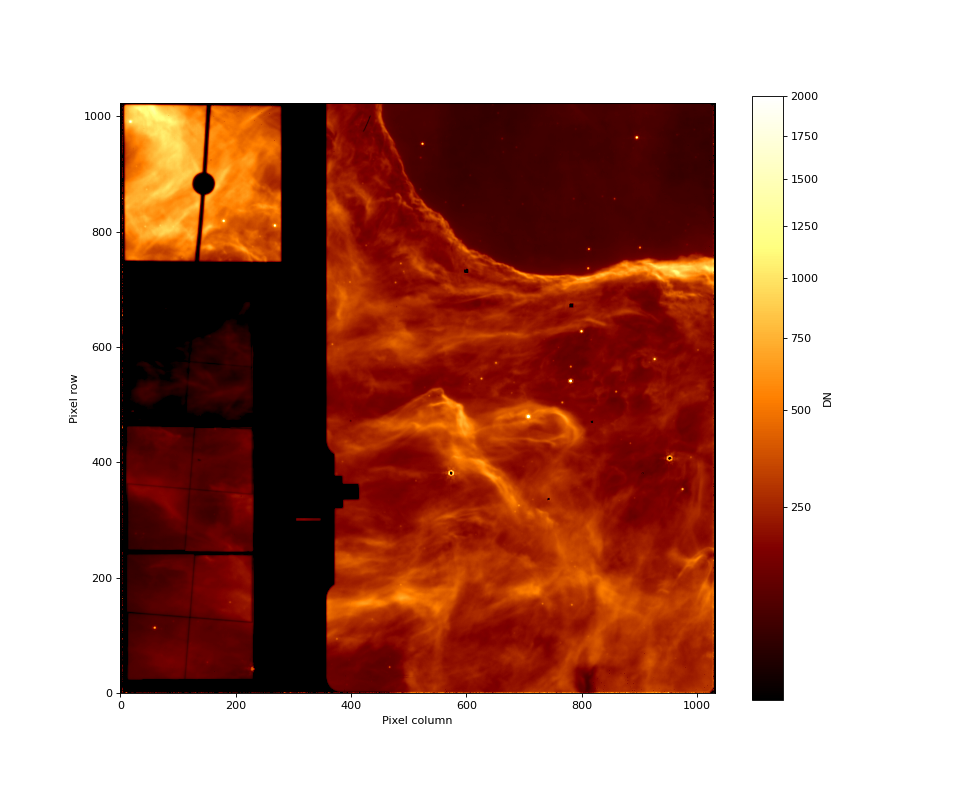

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

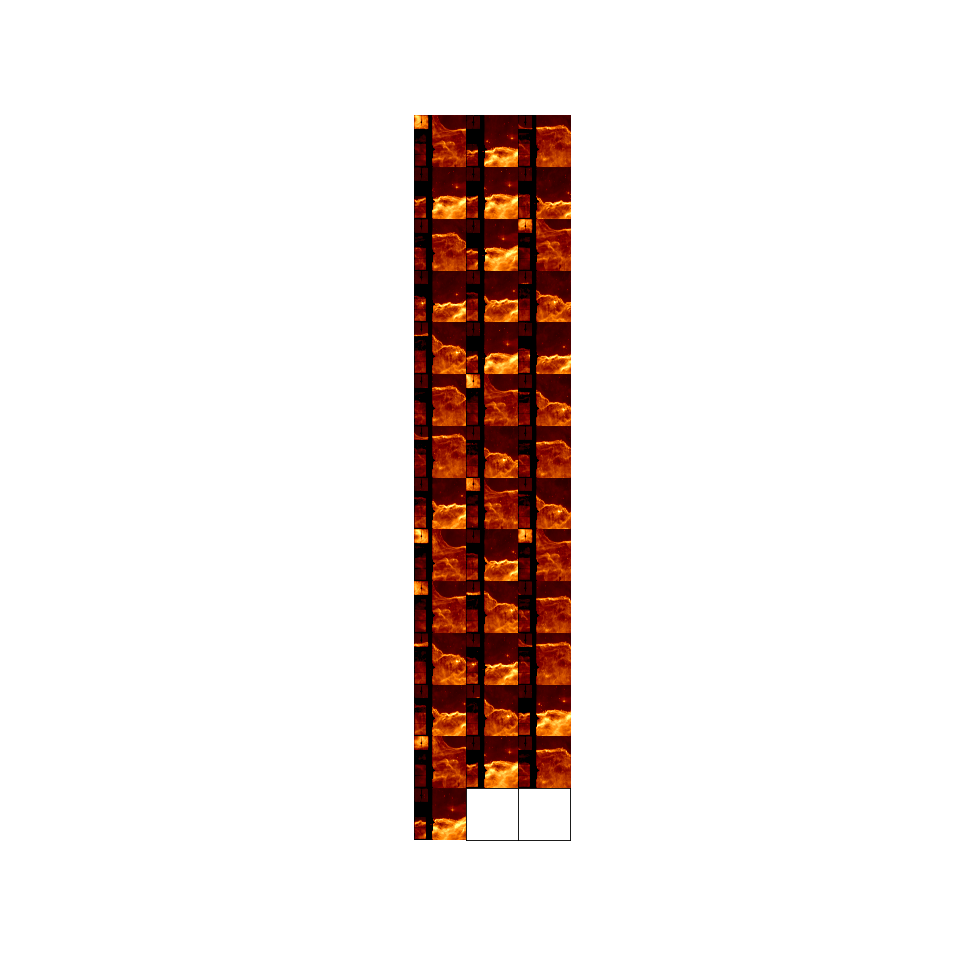

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1130W/stage1/jw02731002005_02103_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002001_02103_00005_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002004_02103_00008_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002001_02103_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002001_02103_00008_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002002_02103_00005_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002004_02103_00006_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002001_02103_00007_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002005_02103_00003_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002002_02103_00006_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002002_02103_00008_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002003_02103_00007_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002003_02103_00008_mirimage_fixed_rate.fits', './F1130W/stage1/jw02731002001_02103_00001_mirimage_fixed_rate.fits', './F1130W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-25 13:03:39,406 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-25 13:03:39,407 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-25 13:03:39,408 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-25 13:03:39,409 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-25 13:03:41,556 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:03:41,566 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:41,568 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:03:41,568 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:03:41,568 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:03:41,568 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-

2022-07-25 13:03:41,598 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:03:41,598 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:03:41,599 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:03:41,599 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:03:41,599 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:03:41,599 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,599 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:03:41,600 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:03:41,600 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:03:

2022-07-25 13:03:41,628 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:03:41,628 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:03:41,628 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:03:41,628 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:03:41,629 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:03:41,630 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,630 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:03:41,630 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:03:41,655 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,656 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:03:41,656 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:03:41,657 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:03:41,657 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:03:41,657 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:41,657 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:41,658 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00003_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disp

2022-07-25 13:03:41,686 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,687 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:03:41,687 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:03:41,688 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-25 13:03:41,689 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:03:41,689 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:03:41,689 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:03:41,689 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-07-25 13:03:41,713 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:41,714 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:41,714 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00001_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:03:41,717 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:41,718 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:03:41,718 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-07-25 13:03:41,747 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-25 13:03:41,748 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:03:41,748 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:03:41,749 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:03:41,749 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:03:41,749 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:03:41,750 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:03:41,750 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,750 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:03:41,779 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:41,780 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:03:41,780 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:03:41,780 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:03:41,780 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:03:41,781 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:03:41,781 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,782 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 13:03:41,807 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:03:41,807 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,808 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:03:41,808 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:03:41,808 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:03:41,809 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:03:41,809 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:41,809 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:41,810 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027310020

2022-07-25 13:03:41,839 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:03:41,840 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,841 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:03:41,841 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:03:41,841 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-25 13:03:41,842 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:03:41,842 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-25 13:03:41,867 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:03:41,867 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:41,867 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:41,868 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02103_00008_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:03:41,871 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:41,872 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-25 13:03:41,897 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-25 13:03:41,898 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:03:41,898 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:03:41,899 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:03:41,899 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:03:41,899 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:03:41,899 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:03:41,899 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,900 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:03:41,928 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:41,928 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:03:41,929 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:03:41,929 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:03:41,929 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:03:41,929 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:03:41,930 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,931 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 13:03:41,956 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:03:41,956 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:03:41,956 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:03:41,957 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:03:41,957 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:03:41,957 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:03:41,957 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:41,958 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:41,958 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027310020

2022-07-25 13:03:41,987 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:03:41,988 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:03:41,989 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:03:41,989 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:03:41,990 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-07-25 13:03:41,990 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:03:41,991 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-25 13:03:42,015 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:03:42,015 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:03:42,016 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:03:42,016 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02103_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:03:42,019 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:03:42,020 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-25 13:03:43,588 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-25 13:03:43,638 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:03:43,640 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:03:43,640 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:03:43,641 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:03:43,657 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:03:43,889 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002005_02103_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:03:43,891 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 

2022-07-25 13:03:49,674 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-25 13:03:49,698 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:03:49,840 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:03:50,299 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:03:50,628 - stpip

2022-07-25 13:03:55,517 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:03:55,975 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:03:56,304 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:03:56,764 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:03:57,092 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:03:57,549 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:03:57,886 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:03:58,333 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:03:58,677 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.163173898 -58.640927945 159.217008620 -58.655106569 159.244488720 -58.626813133 159.190686428 -58.612645988
2022-07-25 1

2022-07-25 13:04:03,921 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:04:04,270 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.211387928 -58.594425117 159.265170220 -58.608583978 159.292575518 -58.580280477 159.238825616 -58.566133062
2022-07-25 13:04:04,808 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00002_mirimage_fixed_i2d.fits
2022-07-25 13:04:04,809 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:04:04,809 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02731002001_02103_00002_mirimage_fixed
2022-07-25 13:04:04,810 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002001_02103_00008_mirimage_fixed
2022-07-25 13:04:04,811 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02731002001_02103_00008_mirimage_fixed_rate.fits ...
2022-07-25 13:04:05,109 - stpip

2022-07-25 13:04:10,559 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002002_02103_00005_mirimage_fixed
2022-07-25 13:04:10,560 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02731002002_02103_00005_mirimage_fixed_rate.fits ...
2022-07-25 13:04:10,860 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002002_02103_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:04:10,861 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:04:17,403 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:04:17,482 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.169657203 -58.639223264 159.223390719 -58.653248593 159.250497137 -58.625179758 159.196959051 -58.610883647
2022-07-25 13:04:17,483 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.169657203 -58.639223264 159.223390719 -58.653248593 159.250497137 -58.625179758 159.196959051 -58.610883647
2022-07-25 13:04:17,483 - stpip

2022-07-25 13:04:23,340 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.214278198 -58.591406761 159.267955951 -58.605413662 159.294989861 -58.577335552 159.241506911 -58.563057781
2022-07-25 13:04:23,341 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:04:23,407 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:04:23,668 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02103_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:04:23,669 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:04:29,558 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:04:29,558 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:04:29,559 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:04:29,564 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:04:29,685 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:04:29,949 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002005_02103_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:04:29,951 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:04:35,788 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002002_02103_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:04:35,790 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:04:35,813 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:04:35,813 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:04:35,898 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:04:35

2022-07-25 13:04:41,712 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:04:41,796 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:04:41,796 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:04:41,797 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:04:41,797 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-25 13:04:41,840 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:04:41,841 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:04:41,842 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:04:41,842 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:04:41,860 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:04:42,137 - stpipe.Ima

2022-07-25 13:04:47,788 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:04:47,788 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:04:47,805 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:04:48,078 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002003_02103_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:04:48,080 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:04:53,870 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:04:54,011 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:04:54,469 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:04:54,799 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:04:55,262 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:04:55,600 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:04:56,057 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:04:56,394 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:04:56,846 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:04:57,199 - stpipe.Image2Pipeline.resample 

2022-07-25 13:05:02,144 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:05:02,603 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:05:02,950 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.214198226 -58.594327198 159.267981617 -58.608484770 159.295384338 -58.580180611 159.241633340 -58.566034485
2022-07-25 13:05:03,506 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00001_mirimage_fixed_i2d.fits
2022-07-25 13:05:03,507 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:05:03,507 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02731002001_02103_00001_mirimage_fixed
2022-07-25 13:05:03,508 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002002_02103_00001_mirimage_fixed
2022-07-25 13:05:03,508 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/

2022-07-25 13:05:09,280 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002004_02103_00007_mirimage_fixed
2022-07-25 13:05:09,281 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02731002004_02103_00007_mirimage_fixed_rate.fits ...
2022-07-25 13:05:09,598 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002004_02103_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:05:09,600 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:05:15,617 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:05:15,699 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.153101196 -58.656569420 159.206854535 -58.670601897 159.233988203 -58.642536662 159.180430529 -58.628233438
2022-07-25 13:05:15,700 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.153101196 -58.656569420 159.206854535 -58.670601897 159.233988203 -58.642536662 159.180430529 -58.628233438
2022-07-25 13:05:15,700 - stpip

2022-07-25 13:05:21,494 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.182642568 -58.628131469 159.236364054 -58.642151569 159.263451793 -58.614080100 159.209925576 -58.599789194
2022-07-25 13:05:21,495 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:05:21,562 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:05:21,853 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002003_02103_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:05:21,855 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:05:27,842 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:05:27,843 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:05:27,843 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:05:27,849 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:05:27,969 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:05:28,248 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02103_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:05:28,249 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:05:34,094 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002003_02103_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:05:34,095 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:05:34,119 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:05:34,119 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:05:34,199 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:05:34

2022-07-25 13:05:39,966 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:05:40,082 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:05:40,082 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:05:40,082 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:05:40,083 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-25 13:05:40,124 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:05:40,126 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:05:40,127 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:05:40,128 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:05:40,145 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:05:40,429 - stpipe.Ima

2022-07-25 13:05:45,977 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:05:45,977 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:05:45,994 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:05:46,278 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002002_02103_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:05:46,280 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:05:52,452 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:05:52,594 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:05:53,060 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:05:53,392 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:05:53,838 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:05:54,174 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:05:54,628 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:05:54,966 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:05:55,426 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:05:55,781 - stpipe.Image2Pipeline.resample 

2022-07-25 13:06:00,848 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:06:01,311 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:06:01,661 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.183554494 -58.625428031 159.237373247 -58.639598500 159.264825348 -58.611300907 159.211039016 -58.597141905
2022-07-25 13:06:02,208 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02731002003_02103_00001_mirimage_fixed_i2d.fits
2022-07-25 13:06:02,209 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:06:02,209 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02731002003_02103_00001_mirimage_fixed
2022-07-25 13:06:02,210 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002005_02103_00005_mirimage_fixed
2022-07-25 13:06:02,211 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/

2022-07-25 13:06:08,277 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002002_02103_00002_mirimage_fixed
2022-07-25 13:06:08,278 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02731002002_02103_00002_mirimage_fixed_rate.fits ...
2022-07-25 13:06:08,620 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002002_02103_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:06:08,621 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:06:14,817 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:06:14,897 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.148064561 -58.656523107 159.201815768 -58.670557719 159.228953523 -58.642493563 159.175398015 -58.628188211
2022-07-25 13:06:14,898 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.148064561 -58.656523107 159.201815768 -58.670557719 159.228953523 -58.642493563 159.175398015 -58.628188211
2022-07-25 13:06:14,898 - stpip

2022-07-25 13:06:20,807 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.154302913 -58.654769647 159.208054127 -58.668801451 159.235185100 -58.640735879 159.181629528 -58.626433323
2022-07-25 13:06:20,807 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:06:20,873 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:06:21,172 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002005_02103_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:06:21,173 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:06:27,101 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:06:27,102 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:06:27,102 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:06:27,107 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:06:27,225 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:06:27,521 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002003_02103_00004_mirimage_fixed_rate.fits>,).
2022-07-25 13:06:27,522 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:06:33,556 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02103_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:06:33,557 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:06:33,584 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:06:33,585 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:06:33,667 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:06:33

2022-07-25 13:06:39,511 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:06:39,591 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:06:39,591 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:06:39,592 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:06:39,592 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-07-25 13:06:39,632 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:06:39,634 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:06:39,635 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:06:39,635 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:06:39,651 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:06:39,954 - stpipe.Ima

2022-07-25 13:06:45,596 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:06:45,596 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-07-25 13:06:45,615 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:06:45,930 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002002_02103_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:06:45,932 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:06:52,023 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:06:52,164 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:06:52,620 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:06:52,951 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:06:53,414 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:06:53,751 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:06:54,210 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:06:54,550 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:06:55,011 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:06:55,365 - stpipe.Image2Pipeline.resample 

2022-07-25 13:07:00,482 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:07:00,942 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:07:01,293 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.191326415 -58.610882826 159.245125782 -58.625050191 159.272560456 -58.596751020 159.218793489 -58.582595113
2022-07-25 13:07:01,859 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02731002002_02103_00004_mirimage_fixed_i2d.fits
2022-07-25 13:07:01,859 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:07:01,860 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02731002002_02103_00004_mirimage_fixed
2022-07-25 13:07:01,861 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002003_02103_00002_mirimage_fixed
2022-07-25 13:07:01,861 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/

2022-07-25 13:07:07,774 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02731002001_02103_00004_mirimage_fixed
2022-07-25 13:07:07,774 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02731002001_02103_00004_mirimage_fixed_rate.fits ...
2022-07-25 13:07:08,133 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002001_02103_00004_mirimage_fixed_rate.fits>,).
2022-07-25 13:07:08,134 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:07:14,218 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:07:14,299 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.145530583 -58.657569816 159.199282507 -58.671605358 159.226422870 -58.643541671 159.172866669 -58.629235393
2022-07-25 13:07:14,299 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.145530583 -58.657569816 159.199282507 -58.671605358 159.226422870 -58.643541671 159.172866669 -58.629235393
2022-07-25 13:07:14,300 - stpip

2022-07-25 13:07:20,254 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.207106057 -58.593768838 159.260784556 -58.607778737 159.287826065 -58.579702135 159.234342433 -58.565421379
2022-07-25 13:07:20,254 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:07:20,324 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:07:20,638 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02103_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:07:20,639 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:07:26,653 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:07:26,654 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:07:26,654 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:07:26,659 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:07:26,781 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:07:27,101 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02103_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:07:27,103 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:07:33,047 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002001_02103_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:07:33,048 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:07:33,072 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:07:33,073 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:07:33,156 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:07:33

2022-07-25 13:07:38,595 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00005_mirimage_fixed_cal.fits
2022-07-25 13:07:39,161 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002004_02103_00008_mirimage_fixed_cal.fits
2022-07-25 13:07:39,737 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00002_mirimage_fixed_cal.fits
2022-07-25 13:07:40,341 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00008_mirimage_fixed_cal.fits
2022-07-25 13:07:40,914 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002002_02103_00005_mirimage_fixed_cal.fits
2022-07-25 13:07:41,481 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002004_02103_00006_mirimage_fixed_cal.fits
2022-07-25 13:07:42,060 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02731002001_02103_00007_mirimage_fixed_cal.fits
2022-07-25 13:07:42,632 - stpipe.I

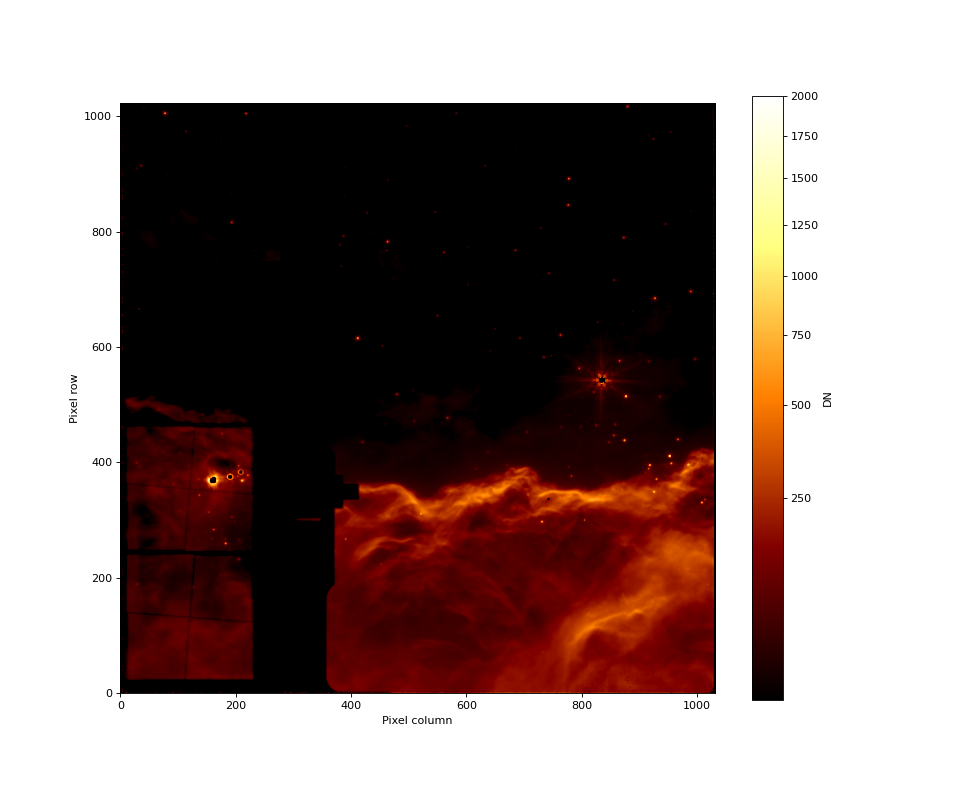

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

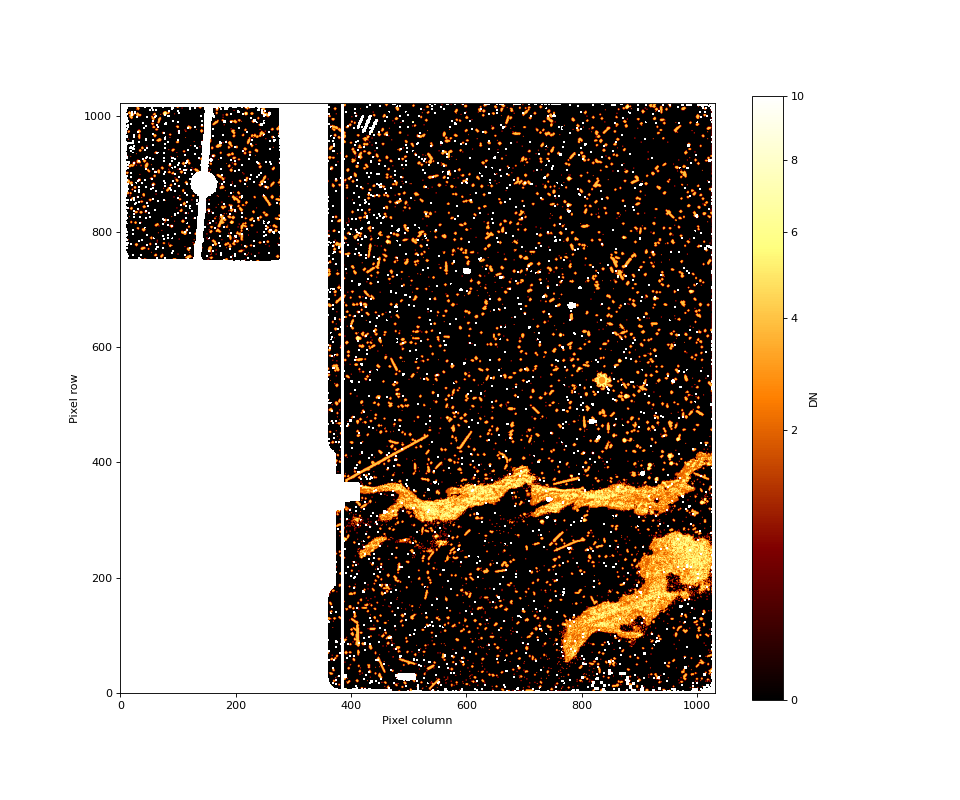

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

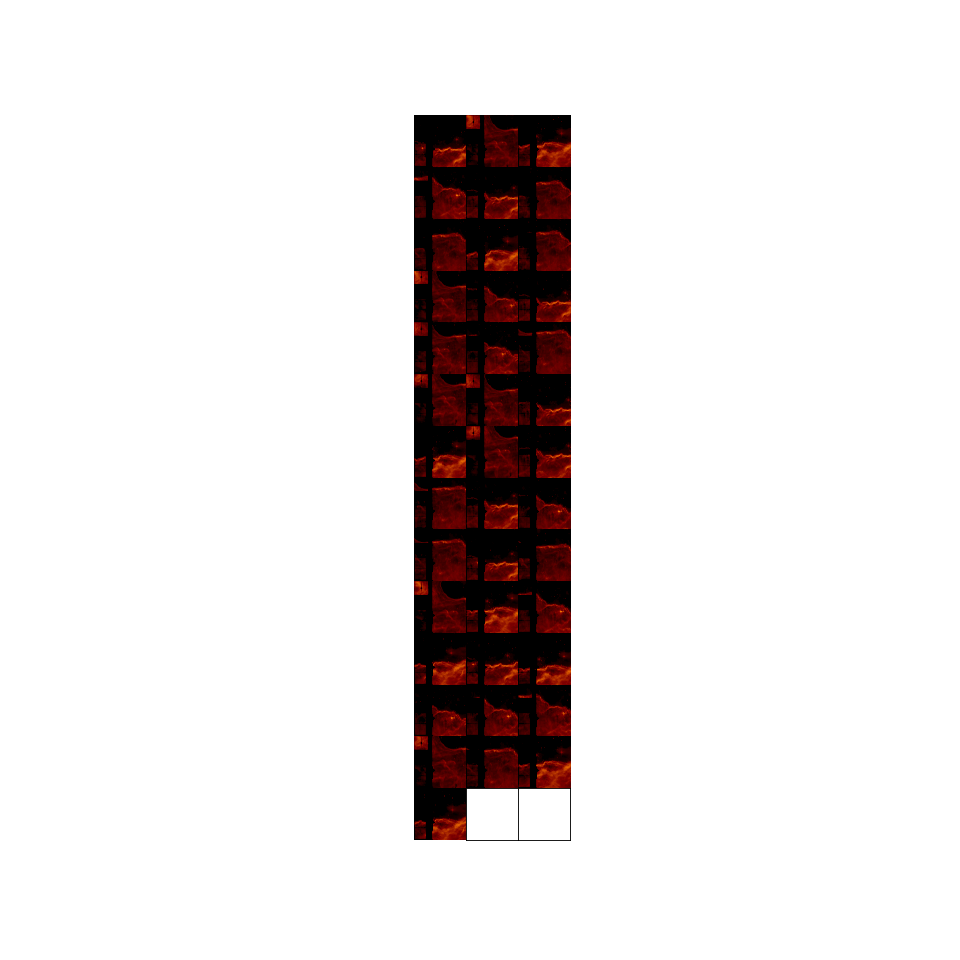

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}3*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}4*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)
    
# update the WCS for mosaic tile 5
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}5*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile5_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1130W/stage2/jw02731002002_02103_00002_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002001_02103_00004_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002003_02103_00006_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002004_02103_00007_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002003_02103_00004_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002005_02103_00008_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002004_02103_00008_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002002_02103_00008_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002002_02103_00003_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002001_02103_00005_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002003_02103_00003_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002002_02103_00006_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002001_02103_00007_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02731002003_02103_00008_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-25 13:09:01,679 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-25 13:09:01,680 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:09:01,680 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-25 13:09:01,681 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-25 13:09:02,236 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:09:02,238 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-25 13:09:10,475 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-25 13:09:10,477 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 3.3, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-25 13:10:09,023 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:09,778 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:10,559 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:11,327 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:12,091 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:12,849 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:13,613 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:14,376 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:10:15,156 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-07-25 13:10:42,605 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 8607 (0.81%)
2022-07-25 13:10:42,682 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 10952 (1.04%)
2022-07-25 13:10:42,758 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 10328 (0.98%)
2022-07-25 13:10:42,834 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 14415 (1.36%)
2022-07-25 13:10:42,910 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 15793 (1.49%)
2022-07-25 13:10:42,986 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 17167 (1.62%)
2022-07-25 13:10:43,061 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 4185 (0.40%)
2022-07-25 13:10:44,123 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1130W/stage3/jw02731002002_02103_00002_mirimage_fixed_wcs_a300

2022-07-25 13:11:22,940 - stpipe.Image3Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:11:23,459 - stpipe.Image3Pipeline.resample - INFO - Blending metadata for miri_F1130W_stage3_asn
2022-07-25 13:11:24,357 - stpipe.Image3Pipeline.resample - INFO - Resampling science data
2022-07-25 13:11:24,966 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:11:25,903 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:11:26,840 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:11:27,793 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:11:28,743 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:11:29,705 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 349

2022-07-25 13:12:34,374 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:35,331 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:36,288 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:37,240 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:38,200 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:39,152 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:40,119 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:40,470 - stpipe.Image3Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:12:41,079 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:12:42,036 - stpipe.Image3Pipeline.resample - INFO

2022-07-25 13:13:46,786 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:47,734 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:48,705 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:49,655 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:50,617 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:51,572 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:52,519 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:53,469 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:54,420 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:13:55,365 - stpipe.Image3Pipelin

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

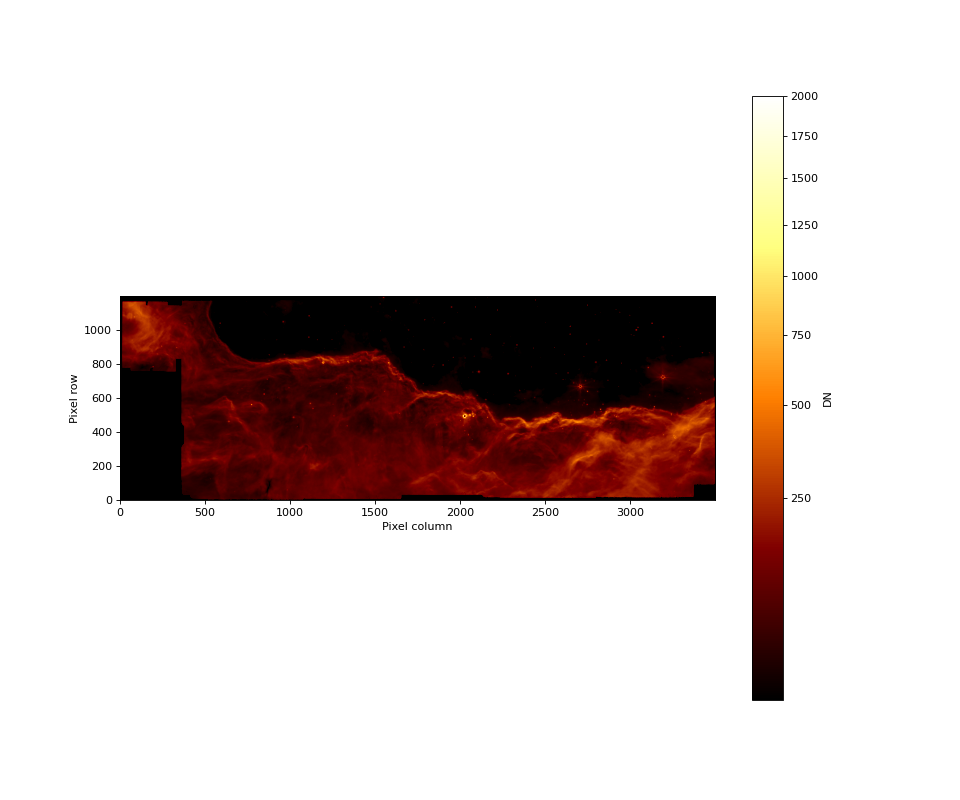

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

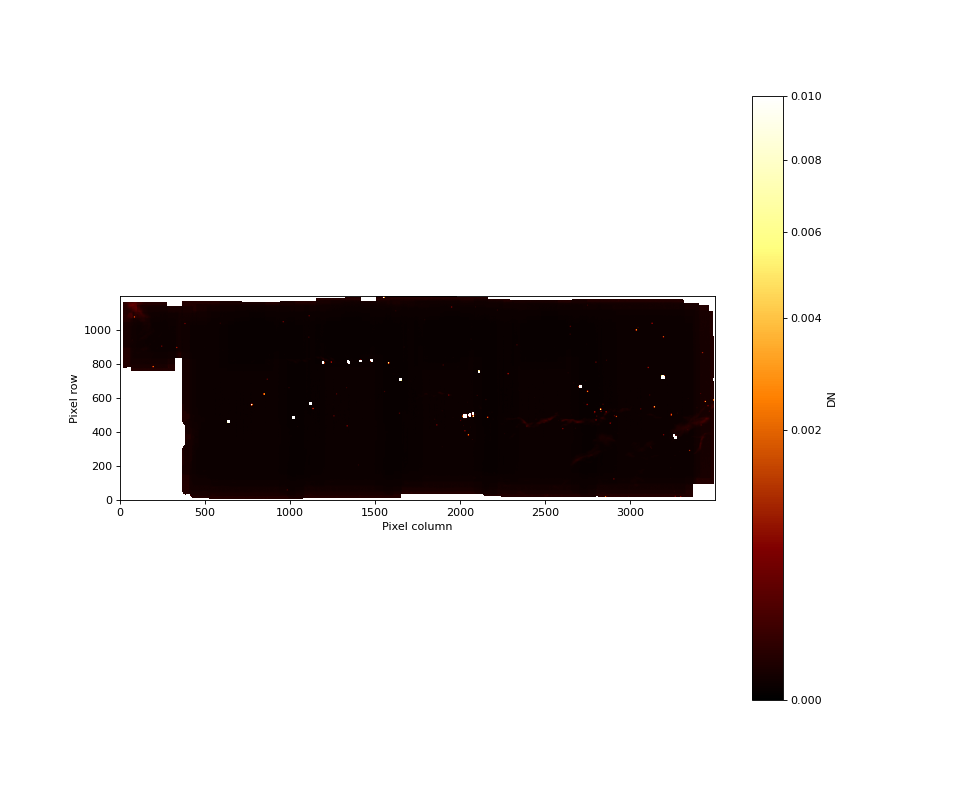

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

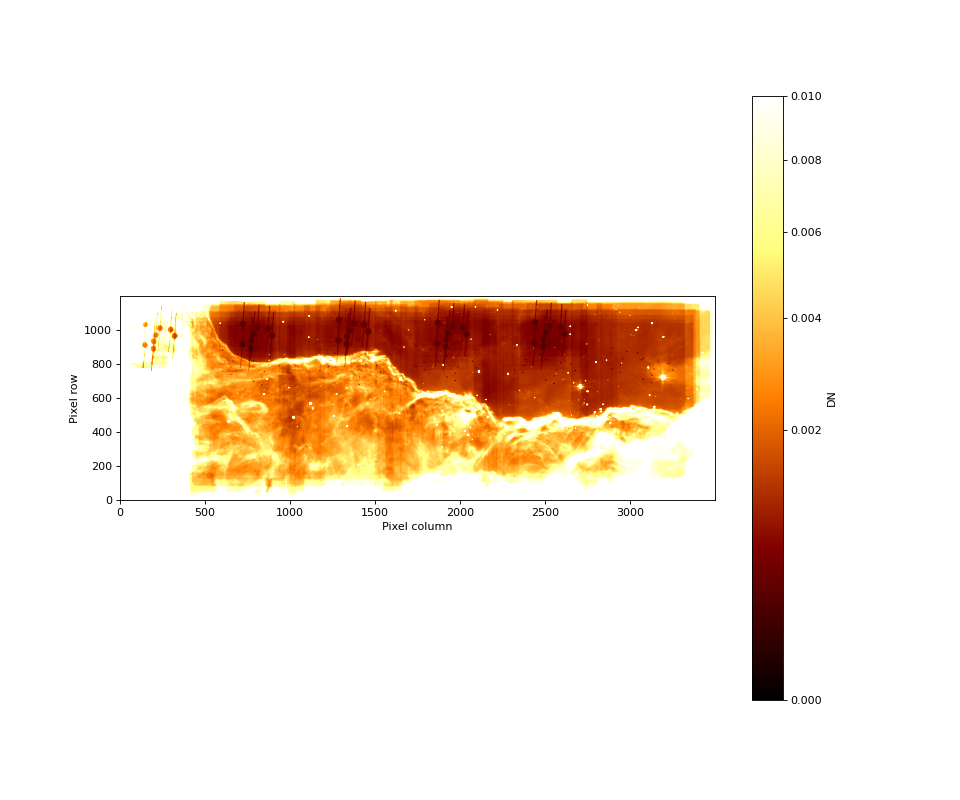

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

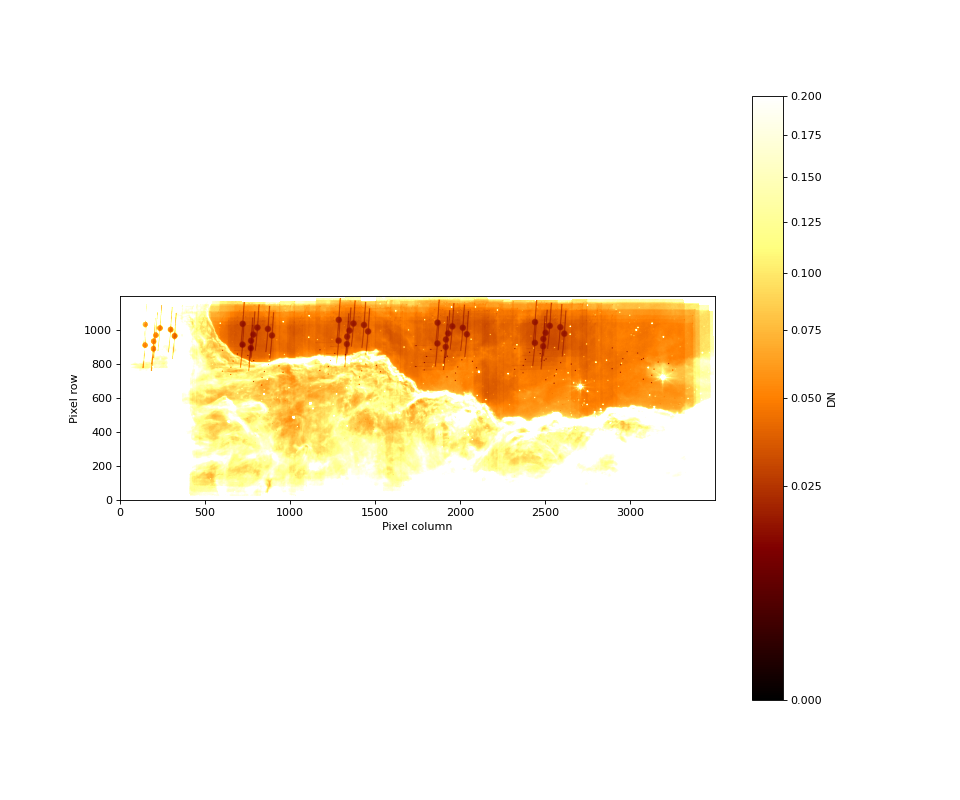

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

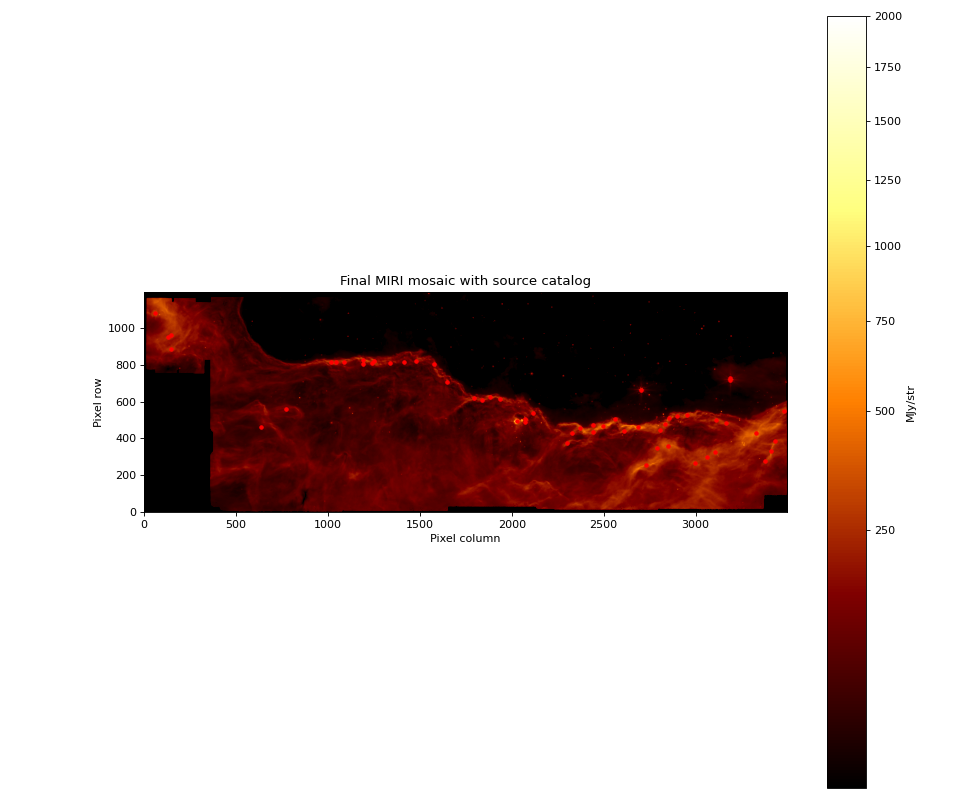

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)